In [179]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

sim = rebound.Simulation()
sim.units = 'day','AU','mSun'

sim.units

{'length': 'au', 'mass': 'msun', 'time': 'day'}

In [180]:
sim.add(m=1.)
sim.add(m=1e-6,a=1.)
sim.add(m=1e-34,primary=sim.particles[1], a=0.01)
sim.add(m=1e-6,a=2., Omega = 2.35)
sim.move_to_com() 

sim.status()

---------------------------------
REBOUND version:     	2.13.10
REBOUND built on:    	Apr  2 2016 12:38:43
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, id=0 m=1.0 x=4.05424342699e-07 y=-1.42294385969e-06 z=0.0 vx=8.65415457878e-09 vy=-8.65449321539e-09 vz=0.0>
<rebound.Particle object, id=0 m=1e-06 x=1.00000040542 y=-1.42294385969e-06 z=0.0 vx=8.65415457878e-09 vy=0.0172020988966 vz=0.0>
<rebound.Particle object, id=0 m=1e-34 x=1.01000040542 y=-1.42294385969e-06 z=0.0 vx=8.65415457878e-09 vy=0.0173741198861 vz=0.0>
<rebound.Particle object, id=0 m=1e-06 x=-1.40542474812 y=1.42294528264 z=0.0 vx=-0.00865416323293 vy=-0.00854760568117 vz=0.0>
---------------------------------


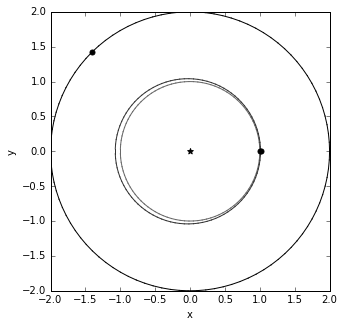

In [181]:
fig = rebound.OrbitPlot(sim)

In [182]:
for o in sim.calculate_orbits():
    print o

<rebound.Orbit instance, a=1.0 e=1.83196410612e-16 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
<rebound.Orbit instance, a=1.04155598996 e=0.0302979295051 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
<rebound.Orbit instance, a=2.0 e=2.32163142444e-16 inc=0.0 Omega=0.0 omega=-1.45307253386 f=3.80307253386>


In [183]:
ps = sim.particles

sun, earth, rocket, mars = ps
rocketLoc = rocket.x, rocket.y, rocket.z
marsLoc = mars.x, mars.y, mars.z
earthLoc = earth.x,earth.y,earth.z
dist = sum((r-m)**2 for r,m in zip(rocketLoc,marsLoc))

print 'Rocket', rocketLoc
print 'Mars', marsLoc
print 'Earth', earthLoc

Rocket (1.0100004054243428, -1.4229438596939694e-06, 0.0)
Mars (-1.405424748123765, 1.422945282637829, 0.0)
Earth (1.0000004054243428, -1.4229438596939694e-06, 0.0)


In [184]:
print 'Distance between Rocket and Mars: %g AU' % dist

Distance between Rocket and Mars: 7.85906 AU


In [185]:
def distance():
    dist = sum((r-m)**2 for r,m in zip(rocketLoc,marsLoc))

    print 'Rocket', rocketLoc
    print 'Mars', marsLoc
    print 'Earth', earthLoc
    
    print 'Distance between Rocket and Mars: %g AU' % dist
    
    fig = rebound.OrbitPlot(sim)

Rocket (1.0100004054243428, -1.4229438596939694e-06, 0.0)
Mars (-1.405424748123765, 1.422945282637829, 0.0)
Earth (1.0000004054243428, -1.4229438596939694e-06, 0.0)
Distance between Rocket and Mars: 7.85906 AU
336.0 hours


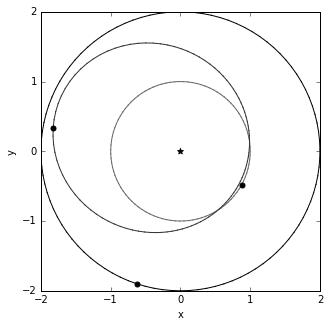

In [190]:
def accelerateLeft(reb_sim):
    rocket.ax += 0.0000 #0.0001/24
    rocket.ay += 0.0000
sim.additional_forces = accelerateLeft

sim.integrate(sim.t + 10*24)
distance()
print sim.t, 'hours'